# EDA - Technical Analysis Data (OHLCV)

**Exploratory Data Analysis** cho dữ liệu giá cổ phiếu Việt Nam (2022-2025)

---

## Nội dung

1. **Mô tả dữ liệu** (Data Description)
2. **Kiểm tra chất lượng dữ liệu** (Data Quality Check)
3. **Tạo đặc trưng cơ bản** (Feature Engineering)
4. **Trực quan hóa & Phân tích** (Visualization & Insights)
5. **Tổng kết** (Conclusion)

## 0. Import Libraries & Load Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Plotting configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [ ]:
# Load data
DATA_PATH = Path("../../data/raw/ta/ta_data_top100_2023-01-01_2025-10-31.csv")

df = pd.read_csv(DATA_PATH)
df['time'] = pd.to_datetime(df['time'])

print(f"✓ Data loaded successfully: {DATA_PATH.name}")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Dataset: TOP 100 STOCKS (selected by FA ranking)")

✓ Data loaded successfully: ta_data_top100_2022-10-31_2025-10-31.csv
Shape: 76,612 rows × 7 columns
Dataset: TOP 100 STOCKS (selected by FA ranking)


In [3]:
# Quick preview
df.head(10)

,time,open,high,low,close,volume,symbol
0,2022-09-09,59.8,60.2,59.5,59.9,1443100,VHM
1,2022-09-12,60.1,61.8,60.1,61.4,3894313,VHM
2,2022-09-13,61.5,61.5,60.7,60.7,2252100,VHM
3,2022-09-14,59.8,60.3,59.7,60.0,1784500,VHM
4,2022-09-15,60.0,60.5,59.8,60.5,1910900,VHM
5,2022-09-16,60.0,61.1,59.6,59.6,2368800,VHM
6,2022-09-19,59.6,59.8,58.4,58.4,1944900,VHM
7,2022-09-20,58.6,59.3,58.6,58.9,1539400,VHM
8,2022-09-21,58.9,58.9,58.0,58.3,1732700,VHM
9,2022-09-22,57.8,58.0,56.6,57.7,2370700,VHM


---

## 1. Mô tả Dữ liệu (Data Description)

### 1.1. Cấu trúc Dữ liệu (Data Structure)

In [4]:
# Dataset shape
print("=" * 60)
print("DATASET STRUCTURE")
print("=" * 60)
print(f"Total Rows:    {df.shape[0]:>12,}")
print(f"Total Columns: {df.shape[1]:>12,}")
print(f"\nMemory Usage:  {df.memory_usage(deep=True).sum() / 1024**2:>12,.2f} MB")
print("=" * 60)

DATASET STRUCTURE
Total Rows:          76,612
Total Columns:            7

Memory Usage:          7.89 MB


In [5]:
# Data types
print("\nDATA TYPES:")
print(df.dtypes)
print("\n" + "=" * 60)


DATA TYPES:
time      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
symbol            object
dtype: object



### 1.2. Phạm vi Dữ liệu (Data Scope)

In [6]:
# Time scope
print("=" * 60)
print("DATA SCOPE")
print("=" * 60)
print(f"Start Date:         {df['time'].min().strftime('%Y-%m-%d')}")
print(f"End Date:           {df['time'].max().strftime('%Y-%m-%d')}")
print(f"Total Days:         {(df['time'].max() - df['time'].min()).days:,} days")
print(f"Unique Symbols:     {df['symbol'].nunique():,} stocks")
print(f"Avg Rows/Symbol:    {df.shape[0] / df['symbol'].nunique():,.0f} rows")
print("=" * 60)

DATA SCOPE
Start Date:         2021-05-21
End Date:           2025-10-31
Total Days:         1,624 days
Unique Symbols:     100 stocks
Avg Rows/Symbol:    766 rows


### 1.3. Thống kê Tóm tắt (Summary Statistics)

In [7]:
# Summary statistics
print("\nSUMMARY STATISTICS (OHLCV):")
print("=" * 80)
display(df[['open', 'high', 'low', 'close', 'volume']].describe())


SUMMARY STATISTICS (OHLCV):


,open,high,low,close,volume
count,76612.000000,76612.000000,76612.000000,76612.000000,7.661200e+04
mean,36.380988,36.891209,35.826944,36.363293,3.329365e+06
std,29.098513,29.503007,28.626417,29.075454,7.236424e+06
min,0.900000,1.000000,0.900000,1.000000,0.000000e+00
25%,15.830000,16.120000,15.540000,15.830000,3.650000e+04
50%,27.030000,27.450000,26.605000,27.000000,7.582050e+05
75%,47.520000,48.120000,47.002500,47.502500,3.259870e+06
max,316.130000,316.130000,287.390000,296.800000,2.159991e+08


In [8]:
# Observations
print("\n📊 OBSERVATIONS:")
print(f"  • Price range: {df['close'].min():.2f} - {df['close'].max():,.2f} VND")
print(f"  • Average close price: {df['close'].mean():,.2f} VND")
print(f"  • Price std deviation: {df['close'].std():,.2f} VND (high variability)")
print(f"  • Volume is highly skewed (mean >> median)")
print(f"  • Max volume: {df['volume'].max():,.0f} (potential outlier or IPO day)")


📊 OBSERVATIONS:
  • Price range: 1.00 - 296.80 VND
  • Average close price: 36.36 VND
  • Price std deviation: 29.08 VND (high variability)
  • Volume is highly skewed (mean >> median)
  • Max volume: 215,999,100 (potential outlier or IPO day)


---

## 2. Kiểm tra Chất lượng Dữ liệu (Data Quality Check)

### 2.1. Kiểm tra Giá trị Thiếu (Missing Values)

In [9]:
# Missing values analysis
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

print(missing_data.to_string(index=False))
print("=" * 60)

if df.isnull().sum().sum() == 0:
    print("✓ No missing values detected!")
else:
    print("⚠ Missing values found - need handling")

MISSING VALUES ANALYSIS
Column  Missing_Count  Missing_Percentage
  time              0                 0.0
  open              0                 0.0
  high              0                 0.0
   low              0                 0.0
 close              0                 0.0
volume              0                 0.0
symbol              0                 0.0
✓ No missing values detected!


### 2.2. Kiểm tra Tính Nhất quán (Consistency Check)

In [10]:
# Consistency checks
print("=" * 60)
print("CONSISTENCY CHECKS")
print("=" * 60)

# Price logic checks
invalid_high_low = (df['high'] < df['low']).sum()
invalid_high_close = (df['high'] < df['close']).sum()
invalid_high_open = (df['high'] < df['open']).sum()
invalid_low_close = (df['low'] > df['close']).sum()
invalid_low_open = (df['low'] > df['open']).sum()
invalid_volume = (df['volume'] < 0).sum()

print(f"Rows where HIGH < LOW:   {invalid_high_low:>10,}")
print(f"Rows where HIGH < CLOSE: {invalid_high_close:>10,}")
print(f"Rows where HIGH < OPEN:  {invalid_high_open:>10,}")
print(f"Rows where LOW > CLOSE:  {invalid_low_close:>10,}")
print(f"Rows where LOW > OPEN:   {invalid_low_open:>10,}")
print(f"Rows where VOLUME < 0:   {invalid_volume:>10,}")
print("=" * 60)

total_inconsistent = (invalid_high_low + invalid_high_close + invalid_high_open + 
                      invalid_low_close + invalid_low_open + invalid_volume)

if total_inconsistent == 0:
    print("✓ All price logic checks passed!")
else:
    print(f"⚠ Found {total_inconsistent} inconsistent rows")

CONSISTENCY CHECKS
Rows where HIGH < LOW:            0
Rows where HIGH < CLOSE:          0
Rows where HIGH < OPEN:          20
Rows where LOW > CLOSE:           0
Rows where LOW > OPEN:           12
Rows where VOLUME < 0:            0
⚠ Found 32 inconsistent rows


In [11]:
# Check for duplicates
print("\nDUPLICATE CHECK:")
duplicates = df.duplicated(subset=['time', 'symbol']).sum()
print(f"Duplicate (time, symbol) pairs: {duplicates:,}")

if duplicates > 0:
    print("⚠ Found duplicate records - need to deduplicate")
else:
    print("✓ No duplicates found")


DUPLICATE CHECK:
Duplicate (time, symbol) pairs: 0
✓ No duplicates found


---

## 3. Tạo Đặc trưng Cơ bản (Feature Engineering)

### 3.1. Tính Toán Return & Volatility

In [12]:
# Sort data by symbol and time
df = df.sort_values(['symbol', 'time']).reset_index(drop=True)

# Calculate features for each symbol
print("Creating features...")

# Daily Return (%)
df['daily_return'] = df.groupby('symbol')['close'].pct_change() * 100

# Next Day Return (Target variable)
df['next_day_return'] = df.groupby('symbol')['close'].pct_change().shift(-1) * 100

# Volatility (20-day rolling std of returns)
df['volatility'] = df.groupby('symbol')['daily_return'].transform(
    lambda x: x.rolling(window=20, min_periods=1).std()
)

# Moving Average (20-day)
df['ma_20'] = df.groupby('symbol')['close'].transform(
    lambda x: x.rolling(window=20, min_periods=1).mean()
)

# MA Divergence (%)
df['ma_divergence'] = ((df['close'] - df['ma_20']) / df['ma_20']) * 100

# Price Range (High - Low)
df['price_range'] = df['high'] - df['low']

# Price Range %
df['price_range_pct'] = (df['price_range'] / df['low']) * 100

print("✓ Features created successfully")
print(f"New columns: {list(df.columns[-7:])}")

Creating features...


✓ Features created successfully
New columns: ['daily_return', 'next_day_return', 'volatility', 'ma_20', 'ma_divergence', 'price_range', 'price_range_pct']


### 3.2. Tạo Nhãn Phân loại (Label Generation)

In [13]:
# Create trend labels based on next_day_return
THRESHOLD = 1.0  # 1% threshold

def classify_trend(return_value):
    if pd.isna(return_value):
        return None
    elif return_value > THRESHOLD:
        return 'Up'
    elif return_value < -THRESHOLD:
        return 'Down'
    else:
        return 'Hold'

df['trend'] = df['next_day_return'].apply(classify_trend)

print(f"✓ Trend labels created with threshold = ±{THRESHOLD}%")
print(f"\nLabel distribution:")
print(df['trend'].value_counts())
print(f"\nLabel distribution (%):")
print(df['trend'].value_counts(normalize=True).mul(100).round(2))

✓ Trend labels created with threshold = ±1.0%

Label distribution:
trend
Hold    38419
Up      19513
Down    18580
Name: count, dtype: int64

Label distribution (%):
trend
Hold    50.21
Up      25.50
Down    24.28
Name: proportion, dtype: float64


In [14]:
# Preview engineered features
print("\nSample data with engineered features:")
display(df[['time', 'symbol', 'close', 'daily_return', 'next_day_return', 'volatility', 'ma_divergence', 'trend']].head(25))


Sample data with engineered features:


,time,symbol,close,daily_return,next_day_return,volatility,ma_divergence,trend
0,2022-09-09,ABR,8.30,NaN,0.000000,NaN,0.000000,Hold
1,2022-09-12,ABR,8.30,0.000000,0.000000,NaN,0.000000,Hold
2,2022-09-13,ABR,8.30,0.000000,-4.578313,0.000000,0.000000,Down
3,2022-09-14,ABR,7.92,-4.578313,4.419192,2.643290,-3.473492,Up
4,2022-09-15,ABR,8.27,4.419192,-1.330109,3.673503,0.632757,Down
5,2022-09-16,ABR,8.16,-1.330109,0.000000,3.233258,-0.588832,Hold
6,2022-09-19,ABR,8.16,0.000000,0.857843,2.894469,-0.505138,Hold
7,2022-09-20,ABR,8.23,0.857843,0.850547,2.675143,0.304692,Hold
8,2022-09-21,ABR,8.30,0.850547,4.578313,2.498935,1.027860,Up
9,2022-09-22,ABR,8.68,4.578313,-6.336406,2.786628,5.059308,Down


---

## 4. Trực quan hóa & Phân tích (Visualization & Insights)

### 4.1. Phân tích Xu hướng Thị trường (Market Trend Analysis)

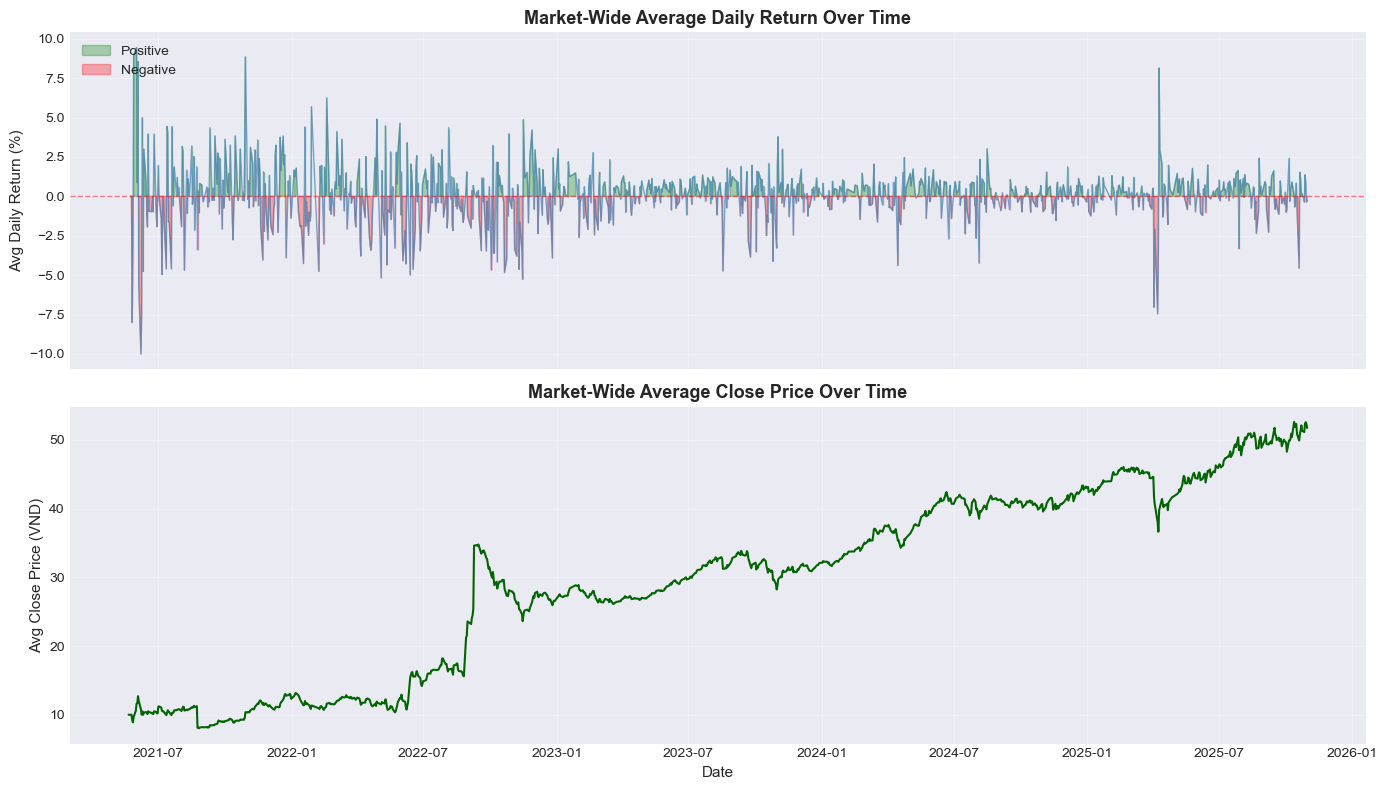

📈 INSIGHTS:
  • Overall market trend: Uptrend
  • Average daily return: 0.099%
  • Most volatile period: 2021-06-07


In [15]:
# Aggregate market-wide daily returns
market_daily = df.groupby('time').agg({
    'daily_return': 'mean',
    'volume': 'sum',
    'close': 'mean'
}).reset_index()

# Plot market trend
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Average daily return
axes[0].plot(market_daily['time'], market_daily['daily_return'], linewidth=1, alpha=0.7, color='steelblue')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[0].fill_between(market_daily['time'], market_daily['daily_return'], 0, 
                      where=(market_daily['daily_return'] > 0), color='green', alpha=0.3, label='Positive')
axes[0].fill_between(market_daily['time'], market_daily['daily_return'], 0, 
                      where=(market_daily['daily_return'] <= 0), color='red', alpha=0.3, label='Negative')
axes[0].set_ylabel('Avg Daily Return (%)', fontsize=11)
axes[0].set_title('Market-Wide Average Daily Return Over Time', fontsize=13, fontweight='bold')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# Average close price
axes[1].plot(market_daily['time'], market_daily['close'], linewidth=1.5, color='darkgreen')
axes[1].set_xlabel('Date', fontsize=11)
axes[1].set_ylabel('Avg Close Price (VND)', fontsize=11)
axes[1].set_title('Market-Wide Average Close Price Over Time', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📈 INSIGHTS:")
print(f"  • Overall market trend: {'Uptrend' if market_daily['daily_return'].mean() > 0 else 'Downtrend'}")
print(f"  • Average daily return: {market_daily['daily_return'].mean():.3f}%")
print(f"  • Most volatile period: {market_daily.loc[market_daily['daily_return'].abs().idxmax(), 'time'].strftime('%Y-%m-%d')}")

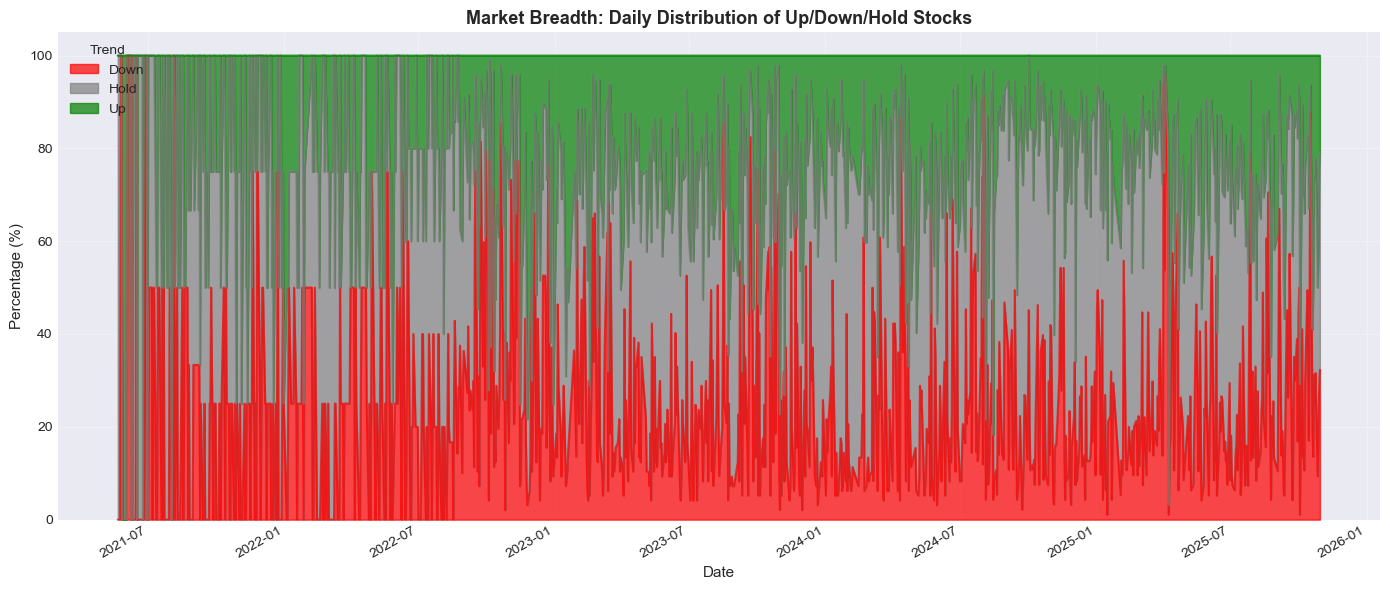

📊 MARKET BREADTH INSIGHTS:
  • Average % Up:   24.9%
  • Average % Down: 23.6%
  • Average % Hold: 51.5%


In [16]:
# Market breadth analysis (% of stocks Up/Down/Hold each day)
df_with_trend = df[df['trend'].notna()].copy()
market_breadth = df_with_trend.groupby(['time', 'trend']).size().unstack(fill_value=0)
market_breadth_pct = market_breadth.div(market_breadth.sum(axis=1), axis=0) * 100

# Plot stacked area chart
fig, ax = plt.subplots(figsize=(14, 6))
market_breadth_pct.plot(kind='area', stacked=True, ax=ax, 
                        color=['red', 'gray', 'green'], alpha=0.7)
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Percentage (%)', fontsize=11)
ax.set_title('Market Breadth: Daily Distribution of Up/Down/Hold Stocks', fontsize=13, fontweight='bold')
ax.legend(title='Trend', loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 MARKET BREADTH INSIGHTS:")
avg_breadth = market_breadth_pct.mean()
print(f"  • Average % Up:   {avg_breadth.get('Up', 0):.1f}%")
print(f"  • Average % Down: {avg_breadth.get('Down', 0):.1f}%")
print(f"  • Average % Hold: {avg_breadth.get('Hold', 0):.1f}%")

### 4.2. Phân tích Phân phối (Distribution Analysis)

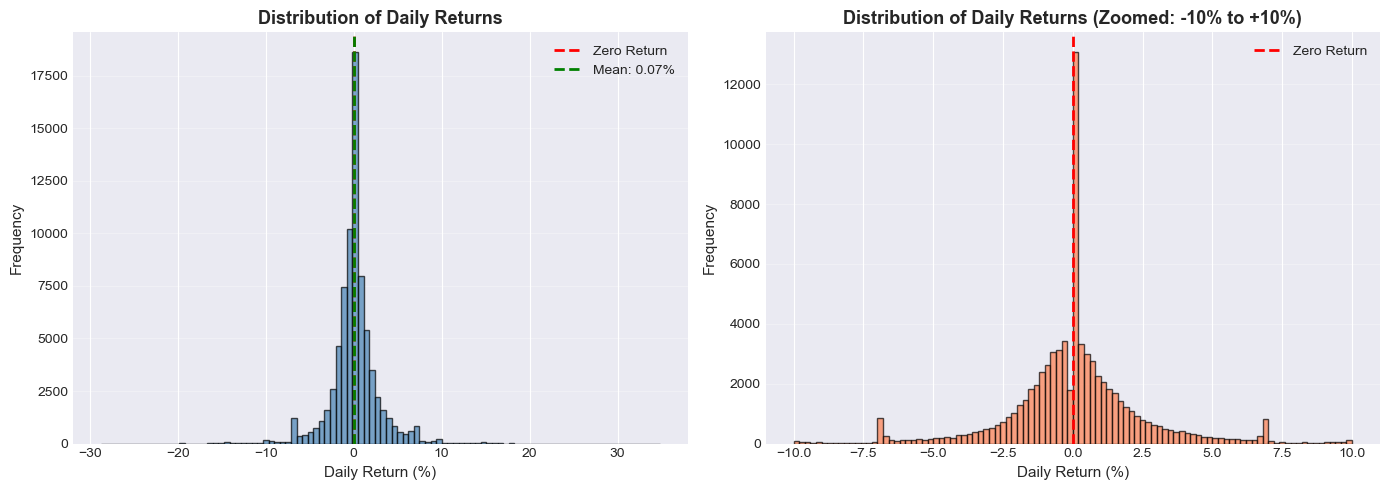

📊 DISTRIBUTION STATISTICS:
  • Mean:     0.0749%
  • Median:   0.0000%
  • Std Dev:  2.7952%
  • Skewness: 0.1715
  • Kurtosis: 6.9066
  • Min:      -28.72%
  • Max:      34.78%

  ⚠ High kurtosis indicates fat tails (extreme events more common than normal distribution)


In [17]:
# Distribution of daily returns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
df_clean = df[df['daily_return'].notna()]
axes[0].hist(df_clean['daily_return'], bins=100, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Return')
axes[0].axvline(x=df_clean['daily_return'].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {df_clean["daily_return"].mean():.2f}%')
axes[0].set_xlabel('Daily Return (%)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Distribution of Daily Returns', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Histogram with limited range (zoom in)
returns_filtered = df_clean[(df_clean['daily_return'] >= -10) & (df_clean['daily_return'] <= 10)]
axes[1].hist(returns_filtered['daily_return'], bins=100, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Return')
axes[1].set_xlabel('Daily Return (%)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Distribution of Daily Returns (Zoomed: -10% to +10%)', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Statistics
print("📊 DISTRIBUTION STATISTICS:")
print(f"  • Mean:     {df_clean['daily_return'].mean():.4f}%")
print(f"  • Median:   {df_clean['daily_return'].median():.4f}%")
print(f"  • Std Dev:  {df_clean['daily_return'].std():.4f}%")
print(f"  • Skewness: {df_clean['daily_return'].skew():.4f}")
print(f"  • Kurtosis: {df_clean['daily_return'].kurtosis():.4f}")
print(f"  • Min:      {df_clean['daily_return'].min():.2f}%")
print(f"  • Max:      {df_clean['daily_return'].max():.2f}%")
print(f"\n  ⚠ High kurtosis indicates fat tails (extreme events more common than normal distribution)")

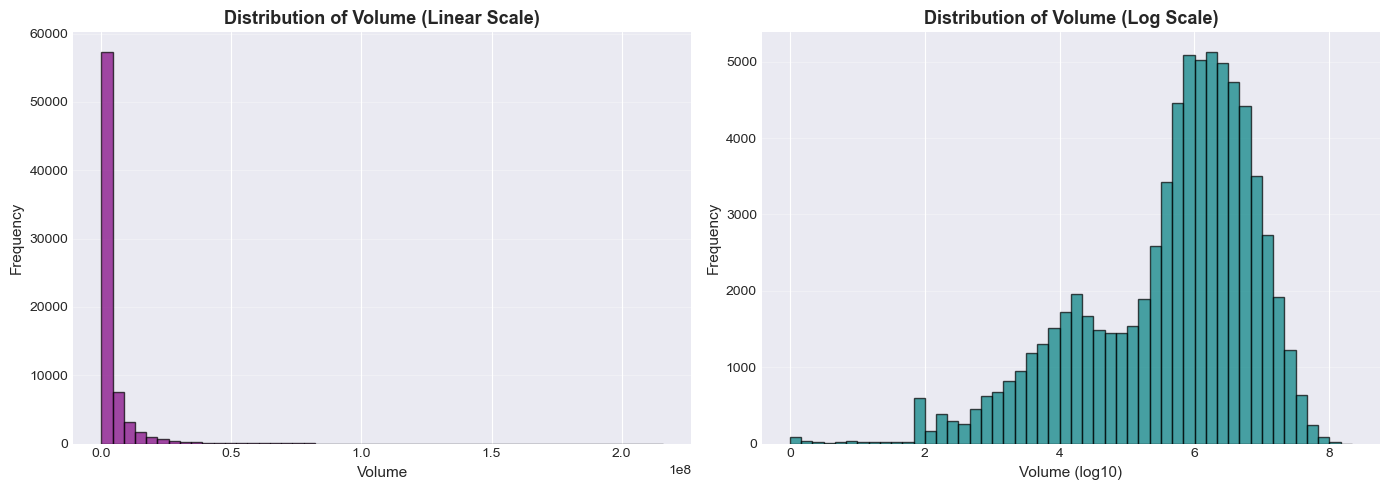

📊 VOLUME DISTRIBUTION:
  • Mean volume:      3,498,365
  • Median volume:    877,061
  • Skewness:         5.44 (highly right-skewed)
  • Days with volume = 0: 3,701 (4.8%)


In [18]:
# Volume distribution (log scale)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Normal scale
df_vol = df[df['volume'] > 0]
axes[0].hist(df_vol['volume'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[0].set_xlabel('Volume', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Distribution of Volume (Linear Scale)', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Log scale
axes[1].hist(np.log10(df_vol['volume']), bins=50, edgecolor='black', alpha=0.7, color='teal')
axes[1].set_xlabel('Volume (log10)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Distribution of Volume (Log Scale)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("📊 VOLUME DISTRIBUTION:")
print(f"  • Mean volume:      {df_vol['volume'].mean():,.0f}")
print(f"  • Median volume:    {df_vol['volume'].median():,.0f}")
print(f"  • Skewness:         {df_vol['volume'].skew():.2f} (highly right-skewed)")
print(f"  • Days with volume = 0: {(df['volume'] == 0).sum():,} ({(df['volume'] == 0).sum() / len(df) * 100:.1f}%)")

### 4.3. Phân tích Nhãn (Label Analysis)

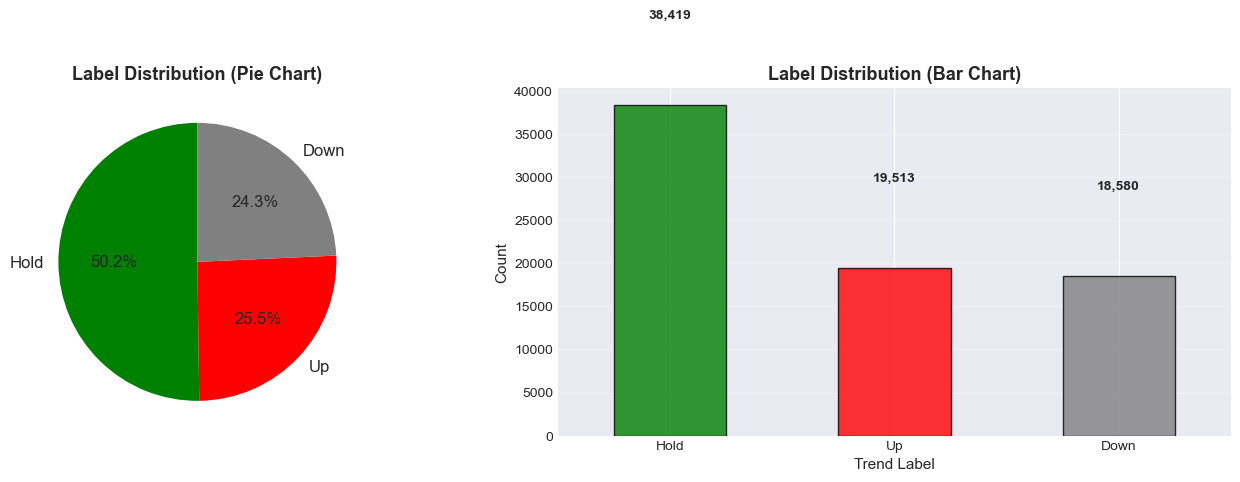

📊 LABEL DISTRIBUTION:
  • Up   :   19,513 (25.50%)
  • Down :   18,580 (24.28%)
  • Hold :   38,419 (50.21%)


In [19]:
# Label distribution visualization
trend_counts = df['trend'].value_counts()
trend_pcts = df['trend'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['green', 'red', 'gray']
axes[0].pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 12})
axes[0].set_title('Label Distribution (Pie Chart)', fontsize=13, fontweight='bold')

# Bar chart
trend_counts.plot(kind='bar', ax=axes[1], color=colors, edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Trend Label', fontsize=11)
axes[1].set_ylabel('Count', fontsize=11)
axes[1].set_title('Label Distribution (Bar Chart)', fontsize=13, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(trend_counts):
    axes[1].text(i, v + 10000, f'{v:,}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 LABEL DISTRIBUTION:")
for label in ['Up', 'Down', 'Hold']:
    if label in trend_counts:
        print(f"  • {label:5s}: {trend_counts[label]:>8,} ({trend_pcts[label]:>5.2f}%)")

# Check for class imbalance
if 'Hold' in trend_pcts and trend_pcts['Hold'] > 60:
    print(f"\n  ⚠ CLASS IMBALANCE DETECTED: 'Hold' dominates at {trend_pcts['Hold']:.1f}%")
    print(f"     Consider using techniques like SMOTE, class weights, or adjusting threshold")

### 4.4. Phân tích Tương quan (Correlation Analysis)

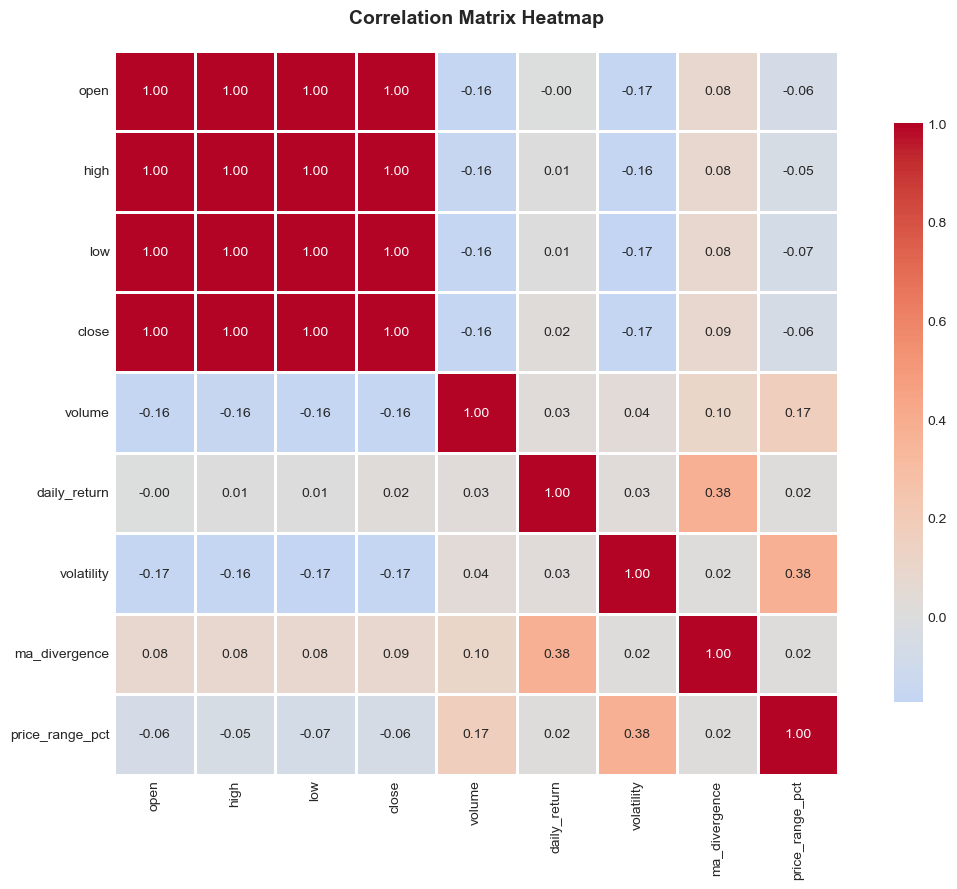

📊 CORRELATION INSIGHTS:

  Strong positive correlations (> 0.8):
    • open            ↔ high           : 1.000
    • open            ↔ low            : 1.000
    • open            ↔ close          : 0.999
    • high            ↔ low            : 0.999
    • high            ↔ close          : 1.000
    • low             ↔ close          : 1.000

  Strong negative correlations (< -0.5):
    • None found

  ⚠ MULTICOLLINEARITY WARNING:
    Open, High, Low, Close are highly correlated (expected)
    Consider using only 'close' price for modeling to avoid redundancy


In [20]:
# Correlation matrix
corr_cols = ['open', 'high', 'low', 'close', 'volume', 'daily_return', 'volatility', 'ma_divergence', 'price_range_pct']
corr_matrix = df[corr_cols].corr()

# Heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("📊 CORRELATION INSIGHTS:")
print("\n  Strong positive correlations (> 0.8):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.8:
            print(f"    • {corr_matrix.columns[i]:15s} ↔ {corr_matrix.columns[j]:15s}: {corr_matrix.iloc[i, j]:.3f}")

print("\n  Strong negative correlations (< -0.5):")
found = False
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] < -0.5:
            print(f"    • {corr_matrix.columns[i]:15s} ↔ {corr_matrix.columns[j]:15s}: {corr_matrix.iloc[i, j]:.3f}")
            found = True
if not found:
    print("    • None found")

print("\n  ⚠ MULTICOLLINEARITY WARNING:")
print("    Open, High, Low, Close are highly correlated (expected)")
print("    Consider using only 'close' price for modeling to avoid redundancy")

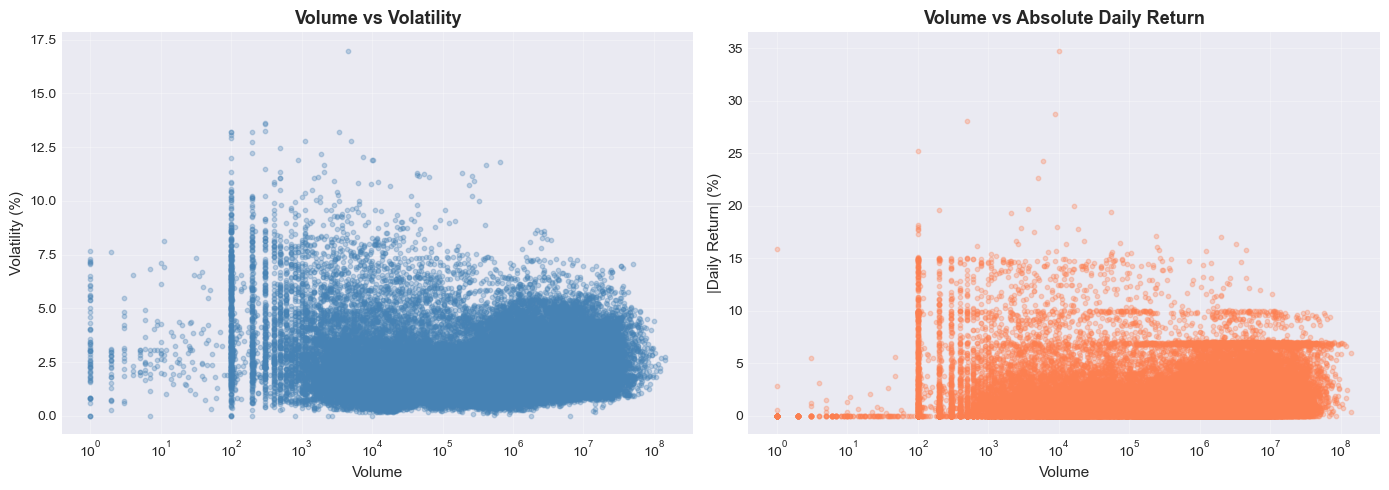

📊 VOLUME-VOLATILITY RELATIONSHIP:
  • Correlation: 0.038
  • Weak correlation - Volume doesn't strongly predict volatility


In [21]:
# Scatter plot: Volume vs Volatility
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sample data for visualization (too many points)
df_sample = df[df['volatility'].notna() & (df['volume'] > 0)].sample(n=min(50000, len(df)), random_state=42)

# Volume vs Volatility
axes[0].scatter(df_sample['volume'], df_sample['volatility'], alpha=0.3, s=10, color='steelblue')
axes[0].set_xlabel('Volume', fontsize=11)
axes[0].set_ylabel('Volatility (%)', fontsize=11)
axes[0].set_title('Volume vs Volatility', fontsize=13, fontweight='bold')
axes[0].set_xscale('log')
axes[0].grid(True, alpha=0.3)

# Volume vs Daily Return (absolute)
axes[1].scatter(df_sample['volume'], df_sample['daily_return'].abs(), alpha=0.3, s=10, color='coral')
axes[1].set_xlabel('Volume', fontsize=11)
axes[1].set_ylabel('|Daily Return| (%)', fontsize=11)
axes[1].set_title('Volume vs Absolute Daily Return', fontsize=13, fontweight='bold')
axes[1].set_xscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 VOLUME-VOLATILITY RELATIONSHIP:")
corr_vol_volatility = df[['volume', 'volatility']].corr().iloc[0, 1]
print(f"  • Correlation: {corr_vol_volatility:.3f}")
if abs(corr_vol_volatility) < 0.3:
    print(f"  • Weak correlation - Volume doesn't strongly predict volatility")

### 4.5. Phát hiện Ngoại lệ (Outlier Detection)

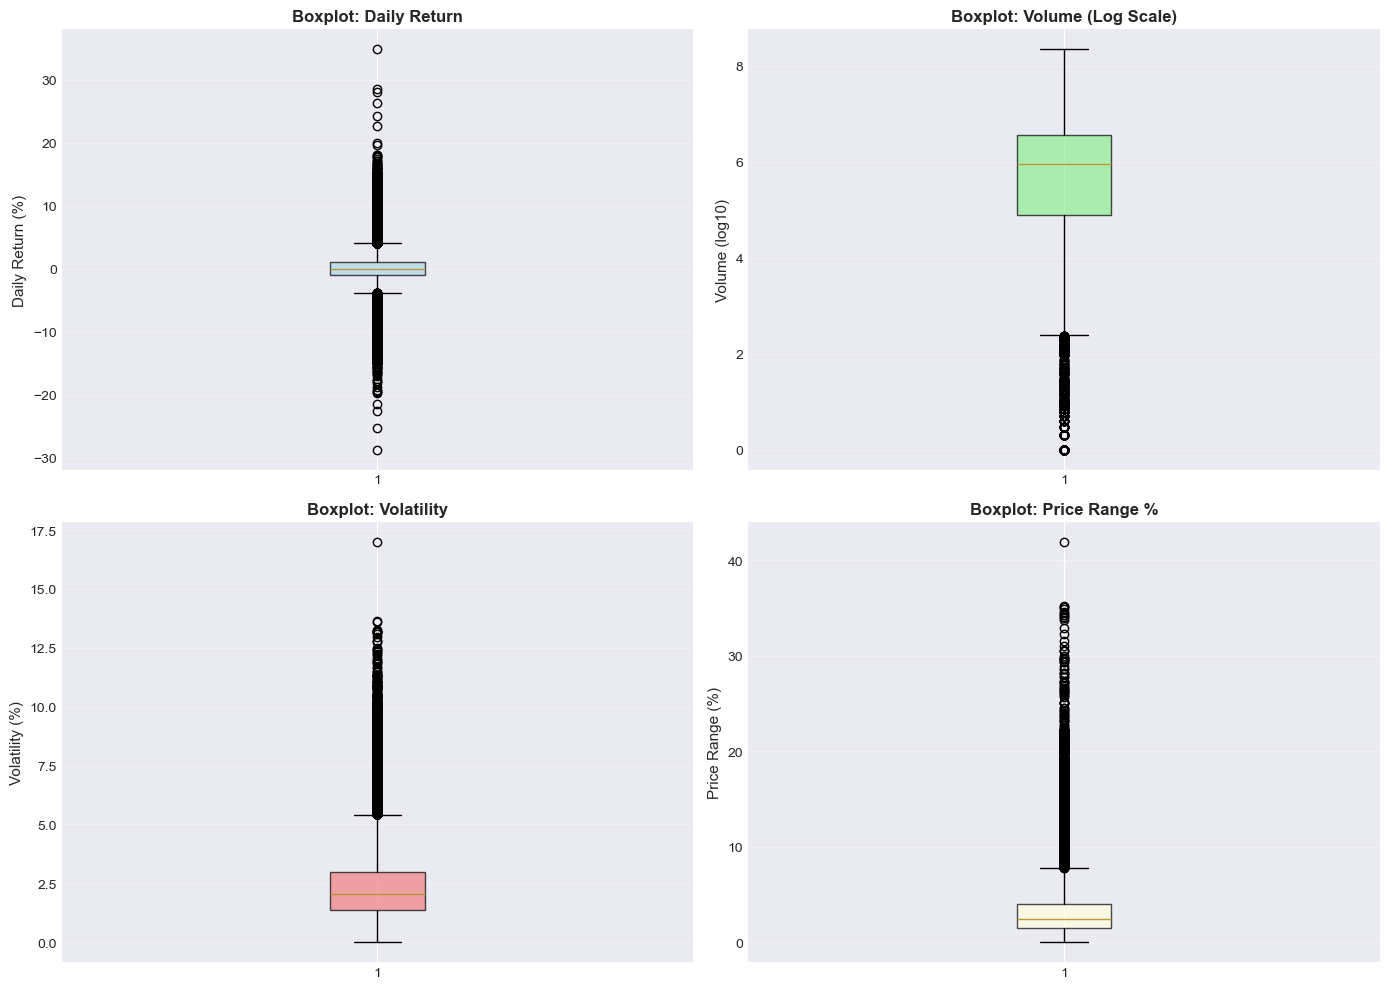

📊 OUTLIER DETECTION (IQR Method):
  • daily_return        :    8,914 outliers (11.65%)
  • volume              :    8,075 outliers (11.08%)
  • volatility          :    3,252 outliers ( 4.26%)
  • price_range_pct     :    4,683 outliers ( 6.11%)

  ⚠ High outlier percentage is expected in financial data due to:
     - Market shocks / Black swan events
     - Stock-specific news (earnings, M&A, etc.)
     - IPO/delisting events


In [22]:
# Boxplots for outlier detection
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Daily Return
axes[0, 0].boxplot(df['daily_return'].dropna(), vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[0, 0].set_ylabel('Daily Return (%)', fontsize=11)
axes[0, 0].set_title('Boxplot: Daily Return', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Volume (log scale)
df_vol_nonzero = df[df['volume'] > 0]
axes[0, 1].boxplot(np.log10(df_vol_nonzero['volume']), vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightgreen', alpha=0.7))
axes[0, 1].set_ylabel('Volume (log10)', fontsize=11)
axes[0, 1].set_title('Boxplot: Volume (Log Scale)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Volatility
axes[1, 0].boxplot(df['volatility'].dropna(), vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightcoral', alpha=0.7))
axes[1, 0].set_ylabel('Volatility (%)', fontsize=11)
axes[1, 0].set_title('Boxplot: Volatility', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Price Range %
axes[1, 1].boxplot(df['price_range_pct'].dropna(), vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightyellow', alpha=0.7))
axes[1, 1].set_ylabel('Price Range (%)', fontsize=11)
axes[1, 1].set_title('Boxplot: Price Range %', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Outlier statistics using IQR method
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((series < lower_bound) | (series > upper_bound)).sum()
    return outliers, (outliers / len(series)) * 100

print("📊 OUTLIER DETECTION (IQR Method):")
for col in ['daily_return', 'volume', 'volatility', 'price_range_pct']:
    if col in df.columns:
        data = df[col].dropna()
        if col == 'volume':
            data = data[data > 0]
        count, pct = count_outliers_iqr(data)
        print(f"  • {col:20s}: {count:>8,} outliers ({pct:>5.2f}%)")

print("\n  ⚠ High outlier percentage is expected in financial data due to:")
print("     - Market shocks / Black swan events")
print("     - Stock-specific news (earnings, M&A, etc.)")
print("     - IPO/delisting events")

In [23]:
# Find extreme outliers
print("\n📍 EXTREME OUTLIERS (Top 10 Daily Returns):")
extreme_returns = df.nlargest(10, 'daily_return')[['time', 'symbol', 'close', 'daily_return']]
display(extreme_returns)

print("\n📍 EXTREME OUTLIERS (Top 10 Volume Spikes):")
extreme_volume = df.nlargest(10, 'volume')[['time', 'symbol', 'volume', 'daily_return']]
display(extreme_volume)


📍 EXTREME OUTLIERS (Top 10 Daily Returns):


,time,symbol,close,daily_return
43461,2025-08-29,PHH,6.20,34.782609
11203,2024-12-20,DDM,1.80,28.571429
13579,2025-08-08,DNH,52.50,28.048780
12970,2023-01-19,DNH,41.26,26.254590
30944,2022-11-10,KSV,33.05,24.294848
57477,2025-04-10,SNZ,27.20,22.633003
11228,2025-07-25,DDM,1.80,20.000000
56497,2024-07-03,SJG,15.78,19.545455
13587,2025-09-12,DNH,55.00,18.025751
6357,2025-02-27,BVL,9.72,17.961165



📍 EXTREME OUTLIERS (Top 10 Volume Spikes):


,time,symbol,volume,daily_return
25329,2025-08-05,HPG,215999100,4.347826
25351,2025-09-08,HPG,141768400,0.347222
25349,2025-09-04,HPG,141435100,6.039076
25331,2025-08-07,HPG,139119300,5.166052
25342,2025-08-22,HPG,132314200,-5.109489
70903,2025-07-03,VIX,125401100,3.663004
25358,2025-09-17,HPG,124424600,-2.504174
25332,2025-08-08,HPG,121062500,-1.754386
70902,2025-07-02,VIX,120961800,6.640625
25348,2025-09-03,HPG,119138500,2.363636


---

## 5. Tổng kết (Conclusion)

### 5.1. Tóm tắt Chất lượng Dữ liệu

In [24]:
print("=" * 80)
print("DATA QUALITY SUMMARY")
print("=" * 80)

# Quality metrics
missing_rate = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
duplicate_rate = (df.duplicated(subset=['time', 'symbol']).sum() / len(df)) * 100
zero_volume_rate = ((df['volume'] == 0).sum() / len(df)) * 100

print(f"\n✓ STRENGTHS:")
print(f"  • No missing values ({missing_rate:.2f}%)")
print(f"  • No duplicate records ({duplicate_rate:.2f}%)")
print(f"  • Price logic is consistent (High >= Low, etc.)")
print(f"  • Large dataset: {len(df):,} rows covering {df['symbol'].nunique()} stocks")

print(f"\n⚠ WEAKNESSES:")
print(f"  • {zero_volume_rate:.1f}% of days have zero volume (illiquid stocks)")
print(f"  • High volatility in returns (fat tails, high kurtosis)")
print(f"  • Volume is highly skewed (median << mean)")
print(f"  • Class imbalance in trend labels ('Hold' dominates)")

print(f"\n📊 OVERALL ASSESSMENT:")
if missing_rate == 0 and duplicate_rate == 0:
    print(f"  ✓ Dataset is CLEAN and READY for modeling")
else:
    print(f"  ⚠ Dataset needs cleaning before modeling")

print("=" * 80)

DATA QUALITY SUMMARY

✓ STRENGTHS:
  • No missing values (0.04%)
  • No duplicate records (0.00%)
  • Price logic is consistent (High >= Low, etc.)
  • Large dataset: 76,612 rows covering 100 stocks

⚠ WEAKNESSES:
  • 4.8% of days have zero volume (illiquid stocks)
  • High volatility in returns (fat tails, high kurtosis)
  • Volume is highly skewed (median << mean)
  • Class imbalance in trend labels ('Hold' dominates)

📊 OVERALL ASSESSMENT:
  ⚠ Dataset needs cleaning before modeling


### 5.2. Đề xuất Xử lý cho Machine Learning

In [25]:
print("=" * 80)
print("RECOMMENDED PREPROCESSING STEPS FOR ML")
print("=" * 80)

print("\n1️⃣ DATA CLEANING:")
print("   • Remove rows with next_day_return = NaN (cannot train on them)")
print("   • Consider filtering out stocks with >50% zero-volume days")
print("   • Cap extreme outliers at 99th percentile (or use robust scaling)")

print("\n2️⃣ FEATURE ENGINEERING:")
print("   • Keep: close, volume, daily_return, volatility, ma_divergence")
print("   • Drop: open, high, low (multicollinearity with close)")
print("   • Add: RSI, MACD, Bollinger Bands (advanced technical indicators)")
print("   • Add: lag features (previous N days returns)")

print("\n3️⃣ FEATURE SCALING:")
print("   • Use RobustScaler (handles outliers better than StandardScaler)")
print("   • Alternative: Log transform for volume")

print("\n4️⃣ HANDLING CLASS IMBALANCE:")
trend_counts = df['trend'].value_counts()
if 'Hold' in trend_counts:
    hold_pct = (trend_counts['Hold'] / trend_counts.sum()) * 100
    if hold_pct > 60:
        print(f"   • 'Hold' class is {hold_pct:.1f}% - SEVERE IMBALANCE")
        print("   • Option 1: Use class_weight='balanced' in model")
        print("   • Option 2: Apply SMOTE (Synthetic Minority Over-sampling)")
        print("   • Option 3: Adjust threshold to reduce 'Hold' dominance")
        print("   • Option 4: Remove 'Hold' class and do binary Up/Down classification")

print("\n5️⃣ TRAIN/TEST SPLIT:")
print("   • Use TimeSeriesSplit (respect temporal order)")
print("   • DON'T use random shuffle (causes data leakage)")
print("   • Recommended: 80/20 split or walk-forward validation")

print("\n6️⃣ FEATURE SELECTION:")
print("   • Check feature importance after initial model")
print("   • Remove features with VIF > 10 (multicollinearity)")

print("=" * 80)
print("\n✅ After these steps, data will be ready for modeling!")

RECOMMENDED PREPROCESSING STEPS FOR ML

1️⃣ DATA CLEANING:
   • Remove rows with next_day_return = NaN (cannot train on them)
   • Consider filtering out stocks with >50% zero-volume days
   • Cap extreme outliers at 99th percentile (or use robust scaling)

2️⃣ FEATURE ENGINEERING:
   • Keep: close, volume, daily_return, volatility, ma_divergence
   • Drop: open, high, low (multicollinearity with close)
   • Add: RSI, MACD, Bollinger Bands (advanced technical indicators)
   • Add: lag features (previous N days returns)

3️⃣ FEATURE SCALING:
   • Use RobustScaler (handles outliers better than StandardScaler)
   • Alternative: Log transform for volume

4️⃣ HANDLING CLASS IMBALANCE:

5️⃣ TRAIN/TEST SPLIT:
   • Use TimeSeriesSplit (respect temporal order)
   • DON'T use random shuffle (causes data leakage)
   • Recommended: 80/20 split or walk-forward validation

6️⃣ FEATURE SELECTION:
   • Check feature importance after initial model
   • Remove features with VIF > 10 (multicollinearity)


### 5.3. Key Findings Summary

In [26]:
print("=" * 80)
print("KEY FINDINGS")
print("=" * 80)

print("\n📌 DATASET CHARACTERISTICS:")
print(f"   • {len(df):,} trading records")
print(f"   • {df['symbol'].nunique()} unique stocks")
print(f"   • {(df['time'].max() - df['time'].min()).days} days of data")
print(f"   • Average price: {df['close'].mean():,.2f} VND")
print(f"   • Average daily return: {df['daily_return'].mean():.3f}%")

print("\n📌 DATA QUALITY:")
print("   ✓ No missing values")
print("   ✓ No duplicates")
print("   ✓ Price logic is valid")
print(f"   ⚠ {((df['volume'] == 0).sum() / len(df) * 100):.1f}% zero-volume days")

print("\n📌 MARKET BEHAVIOR:")
market_avg_return = df.groupby('time')['daily_return'].mean().mean()
print(f"   • Overall market trend: {'Uptrend ↗' if market_avg_return > 0 else 'Downtrend ↘'}")
print(f"   • Return distribution: Fat-tailed (high kurtosis)")
print(f"   • Volume distribution: Right-skewed")

print("\n📌 LABEL DISTRIBUTION:")
trend_pcts = df['trend'].value_counts(normalize=True) * 100
for label in ['Up', 'Down', 'Hold']:
    if label in trend_pcts:
        print(f"   • {label:5s}: {trend_pcts[label]:>5.1f}%")

print("\n📌 FEATURE CORRELATIONS:")
print("   • Open/High/Low/Close: Highly correlated (>0.99)")
print("   • Volume vs Volatility: Weak correlation")
print("   • Price vs Volume: No strong pattern")

print("\n📌 OUTLIERS:")
print("   • Significant outliers present in returns and volume")
print("   • Expected in financial data (market shocks, news events)")

print("=" * 80)
print("\n🎯 CONCLUSION: Dataset is suitable for ML modeling after preprocessing")
print("=" * 80)

KEY FINDINGS

📌 DATASET CHARACTERISTICS:
   • 76,612 trading records
   • 100 unique stocks
   • 1624 days of data
   • Average price: 36.36 VND
   • Average daily return: 0.075%

📌 DATA QUALITY:
   ✓ No missing values
   ✓ No duplicates
   ✓ Price logic is valid
   ⚠ 4.8% zero-volume days

📌 MARKET BEHAVIOR:
   • Overall market trend: Uptrend ↗
   • Return distribution: Fat-tailed (high kurtosis)
   • Volume distribution: Right-skewed

📌 LABEL DISTRIBUTION:
   • Up   :  25.5%
   • Down :  24.3%
   • Hold :  50.2%

📌 FEATURE CORRELATIONS:
   • Open/High/Low/Close: Highly correlated (>0.99)
   • Volume vs Volatility: Weak correlation
   • Price vs Volume: No strong pattern

📌 OUTLIERS:
   • Significant outliers present in returns and volume
   • Expected in financial data (market shocks, news events)

🎯 CONCLUSION: Dataset is suitable for ML modeling after preprocessing


---

## 📝 End of EDA Report

**Next Steps:**
1. Clean and preprocess data based on recommendations
2. Perform feature engineering (add technical indicators)
3. Handle class imbalance
4. Build and train machine learning models
5. Evaluate model performance

---

## 6. Advanced Metrics: Combining FA + TA Data

### 6.1. Calculate P/E and P/B Ratios

Kết hợp dữ liệu **Financial (FA)** và **Technical Analysis (TA)** để tính:
- **P/E Ratio** = Price / EPS (Earnings Per Share)
- **P/B Ratio** = Price / Book Value Per Share

Các chỉ số này giúp đánh giá định giá cổ phiếu so với lợi nhuận và giá trị sổ sách.

In [27]:
# Load FA data (top 100 stocks with financial metrics)
FA_DATA_PATH = Path("../../data/raw/top_100_stocks.csv")

if not FA_DATA_PATH.exists():
    print(f"⚠ FA data not found: {FA_DATA_PATH}")
    print("Please run fa_eda.ipynb first to generate top_100_stocks.csv")
else:
    df_fa = pd.read_csv(FA_DATA_PATH)
    print(f"✓ Loaded FA data: {FA_DATA_PATH.name}")
    print(f"Shape: {df_fa.shape[0]:,} rows × {df_fa.shape[1]} columns")
    print(f"\nColumns: {list(df_fa.columns)}")
    
    # Preview
    display(df_fa[['symbol', 'rank', 'final_score', 'avg_net_profit', 'avg_revenue']].head(10))

✓ Loaded FA data: top_100_stocks.csv
Shape: 100 rows × 13 columns

Columns: ['symbol', 'rank', 'final_score', 'profitability_score', 'growth_score', 'scale_score', 'stability_score', 'avg_revenue', 'avg_net_profit', 'avg_gross_margin', 'avg_net_margin', 'avg_revenue_growth', 'avg_profit_growth']


,symbol,rank,final_score,avg_net_profit,avg_revenue
0,VHM,1,56.34,6.635096e+12,2.087658e+13
1,VEF,2,55.95,4.023985e+12,1.115284e+13
2,HPG,3,47.60,3.599434e+12,3.656572e+13
3,VIC,4,45.97,2.217618e+12,5.794814e+13
4,GAS,5,44.28,3.024339e+12,2.911282e+13
5,PLX,6,42.92,6.639485e+11,7.479223e+13
6,HVN,7,40.94,2.119033e+12,2.902695e+13
7,MWG,8,39.83,1.452997e+12,3.726559e+13
8,FPT,9,39.45,2.240333e+12,1.689997e+13
9,ACV,10,39.32,2.660834e+12,6.259867e+12


In [28]:
# Get latest price for each stock from TA data
latest_prices = df.sort_values('time').groupby('symbol').tail(1)[['symbol', 'close', 'time']].copy()
latest_prices = latest_prices.rename(columns={'close': 'latest_price', 'time': 'price_date'})

print("=" * 80)
print("LATEST PRICES FROM TA DATA")
print("=" * 80)
print(f"\n✓ Extracted latest prices for {len(latest_prices)} stocks")
print(f"Price date range: {latest_prices['price_date'].min()} to {latest_prices['price_date'].max()}")

display(latest_prices.head(10))

LATEST PRICES FROM TA DATA

✓ Extracted latest prices for 100 stocks
Price date range: 2024-07-25 00:00:00 to 2025-10-31 00:00:00


,symbol,latest_price,price_date
3382,ART,1.3,2024-07-25
43468,PHH,6.9,2025-10-24
54472,SDU,16.6,2025-10-30
29320,ITD,13.6,2025-10-31
32464,MBS,29.1,2025-10-31
48184,PVI,73.9,2025-10-31
23818,HCM,23.3,2025-10-31
23032,HAH,61.4,2025-10-31
28534,IDC,38.1,2025-10-31
41110,PC1,20.7,2025-10-31


In [29]:
# Merge FA + TA data
df_combined = pd.merge(df_fa, latest_prices, on='symbol', how='inner')

print("=" * 80)
print("COMBINED FA + TA DATA")
print("=" * 80)
print(f"\n✓ Merged {len(df_combined)} stocks")
print(f"Columns available: {len(df_combined.columns)}")

# For P/E calculation, we need to load more detailed FA data to get EPS
# Load baocaotaichinh.csv to get detailed profit data
FA_DETAILED_PATH = Path("../../data/raw/fa/baocaotaichinh.csv")

if FA_DETAILED_PATH.exists():
    df_baocao = pd.read_csv(FA_DETAILED_PATH)
    
    # Get latest quarter data for each stock
    df_baocao = df_baocao.rename(columns={'CP': 'symbol'})
    df_baocao['year_quarter'] = df_baocao['Năm'].astype(str) + '_Q' + df_baocao['Kỳ'].astype(str)
    
    # Get most recent data
    latest_quarter = df_baocao['year_quarter'].max()
    df_latest_fa = df_baocao[df_baocao['year_quarter'] == latest_quarter][['symbol', 'Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng)']].copy()
    df_latest_fa = df_latest_fa.rename(columns={'Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng)': 'net_profit_latest'})
    
    # Merge
    df_combined = pd.merge(df_combined, df_latest_fa, on='symbol', how='left')
    
    print(f"✓ Added latest FA metrics from {latest_quarter}")

display(df_combined.head(10))

COMBINED FA + TA DATA

✓ Merged 100 stocks
Columns available: 15
✓ Added latest FA metrics from 2025_Q3
✓ Added latest FA metrics from 2025_Q3


,symbol,rank,final_score,profitability_score,growth_score,scale_score,stability_score,avg_revenue,avg_net_profit,avg_gross_margin,avg_net_margin,avg_revenue_growth,avg_profit_growth,latest_price,price_date,net_profit_latest
0,VHM,1,56.34,76.08,15.18,56.75,100.0,2.087658e+13,6.635096e+12,27.32,29.92,0.70,3.75,99.20,2025-10-31,4183929000000
1,VEF,2,55.95,72.13,66.87,35.19,0.0,1.115284e+13,4.023985e+12,-707.11,136098.08,41516.07,43.01,134.60,2025-10-31,167703000000
2,HPG,3,47.60,56.06,15.03,53.34,100.0,3.656572e+13,3.599434e+12,15.54,9.84,0.05,0.18,26.70,2025-10-31,3988318474539
3,VIC,4,45.97,46.94,15.18,63.22,100.0,5.794814e+13,2.217618e+12,6.59,2.86,0.96,3.64,191.00,2025-10-31,640184000000
4,GAS,5,44.28,52.27,15.03,44.33,100.0,2.911282e+13,3.024339e+12,15.03,10.46,0.16,0.07,61.60,2025-10-31,2549118933504
5,PLX,6,42.92,36.71,15.10,68.54,100.0,7.479223e+13,6.639485e+11,6.03,0.87,0.07,1.84,34.55,2025-10-31,610701186200
6,HVN,7,40.94,46.31,15.06,39.50,100.0,2.902695e+13,2.119033e+12,16.81,7.31,0.12,0.92,31.60,2025-10-31,617199713699
7,MWG,8,39.83,41.93,15.14,42.60,100.0,3.726559e+13,1.452997e+12,19.47,3.87,0.13,2.68,82.60,2025-10-31,1770898917304
8,FPT,9,39.45,47.16,15.03,30.41,100.0,1.689997e+13,2.240333e+12,37.39,13.27,0.13,0.20,103.90,2025-10-31,2434841434732
9,ACV,10,39.32,49.99,15.04,24.09,100.0,6.259867e+12,2.660834e+12,61.77,42.68,0.14,0.37,55.40,2025-10-31,2766999404771
